# Section1 Project 


---



## Data EDA 및 전처리 과정 

In [1]:
# 라이브러리 미리 다 불러오기

import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
from sympy import symbols, diff, solve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.misc import derivative

In [2]:
games = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

In [3]:
df_games = games.copy()

In [4]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
df_games.isna().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 약 380개의 데이터가 결측치. 전체 데이터의 약 2% 라서 결측치를 제거해도 무방하다고 판단

df_games.dropna(inplace =True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [7]:
df_games['Year'] = df_games['Year'].astype('int')

In [8]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16241 non-null  int64 
 1   Name         16241 non-null  object
 2   Platform     16241 non-null  object
 3   Year         16241 non-null  int64 
 4   Genre        16241 non-null  object
 5   Publisher    16241 non-null  object
 6   NA_Sales     16241 non-null  object
 7   EU_Sales     16241 non-null  object
 8   JP_Sales     16241 non-null  object
 9   Other_Sales  16241 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [9]:
df_games[df_games['Year'] <= 1900].sample(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
15836,15837,Theatrhythm Dragon Quest,3DS,15,Misc,Square Enix,0,0,0.15,0
3108,3109,NPPL: Championship Paintball 2009,PS2,8,Shooter,Activision Value,0.13,0.1,0,0.03
4746,4747,Dragon Quest Heroes: Rocket Slime,DS,5,Action,Square Enix,0.13,0,0.31,0.01
6113,6114,Kingdom Hearts: Birth by Sleep,PSP,10,Role-Playing,Square Enix,0.63,0.42,0.75,0.26
12636,12637,SD Gundam G Generation DS,DS,5,Role-Playing,Namco Bandai Games,0,0,0.09,0
3746,3747,Disney's Chicken Little: Ace In Action,DS,6,Shooter,Disney Interactive Studios,0.06,0,0,0
14666,14667,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0,0.01
13739,13740,Emergency! Disaster Rescue Squad,DS,9,Simulation,Destineer,0.03,0,0,0
3879,3880,Diner Dash: Sizzle & Serve,DS,7,Puzzle,Eidos Interactive,0.34,0.03,0,0.03
10705,10706,3D Baseball,PS,96,Sports,BMG Interactive Entertainment,0.02,0.01,0,0


In [10]:
# Year 컬럼을 19xx 혹은 20xx 형태로 모두 변환

def year_4(df):
    if len(str(df)) == 4:
      return df

    elif df < 20:
      df = 2000 + df
      return df
    
    else: 
      df = 1900 + df
      return df

df_games['Year'] = df_games['Year'].apply(year_4)

In [11]:
df_games.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [12]:
df_games[df_games['NA_Sales'].str.contains('K')]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,11,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,46,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
145,146,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
878,879,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0
1086,1087,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...,...
15647,15648,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0K,0.01,0,0
16194,16195,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,120K,0.15,0,0.06
16330,16331,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16492,16493,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [13]:
# Sales 항목에 있는 K, M 제거 해주고 K는 /1000 으로 단위를 M으로 맞춰줌. 

def Sales(df):
  if 'M' in df:
    df = float(df.replace('M', ''))
    return df

  elif 'K' in df:
    df = float(df.replace('K', '')) /1000
    return df

  else:
    df = float(df)
    return df

df_games['NA_Sales'] = df_games['NA_Sales'].apply(Sales)
df_games['EU_Sales'] = df_games['EU_Sales'].apply(Sales)
df_games['JP_Sales'] = df_games['JP_Sales'].apply(Sales)
df_games['Other_Sales'] = df_games['Other_Sales'].apply(Sales)

In [14]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  int64  
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  float64
 7   EU_Sales     16241 non-null  float64
 8   JP_Sales     16241 non-null  float64
 9   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.4+ MB


## 지역에 따라 선호하는 게임 장르




In [15]:
df_games['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [16]:
# 게임 장르 : Action, Sports, Misc, Role-Playing, Shooter, Adventure, Racing, Platform,
#             Simulation, Fighting, Strategy, Puzzle  
# 총 12 종류 

In [17]:
# 4분류의 나라마다 장르별 평균 출고량

df_games_NA = df_games[['Platform', 'Year', 'Genre', 'NA_Sales']]
genre_NA = df_games_NA.groupby('Genre').mean().sort_values('NA_Sales', ascending=False).reset_index()
genre_NA['percentage'] = genre_NA['NA_Sales'] / genre_NA['NA_Sales'].sum()
genre_NA_top5 = genre_NA.head(5)

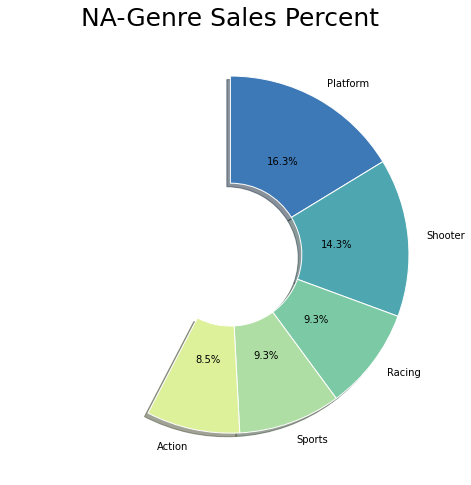

In [18]:
wedgeprops = {'width': 0.60, 'edgecolor': 'w', 'linewidth': 1}
colors = sns.color_palette('Spectral_r', len(genre_NA['Genre']))

plt.figure(figsize=(8,10))
plt.pie(genre_NA_top5['percentage'], 
        labels=genre_NA_top5['Genre'], 
        autopct='%.1f%%', 
        counterclock=False, 
        startangle=90,
        shadow = True,
        wedgeprops=wedgeprops,
        colors =colors);
plt.title('NA-Genre Sales Percent', fontsize=25);


In [19]:
df_games_EU= df_games[['Platform', 'Year', 'Genre', 'EU_Sales']]
genre_EU = df_games_EU.groupby('Genre').mean().sort_values('EU_Sales', ascending=False).reset_index()
genre_EU['percentage'] = genre_EU['EU_Sales'] / genre_EU['EU_Sales'].sum()
genre_EU_top5 = genre_EU.head(5)

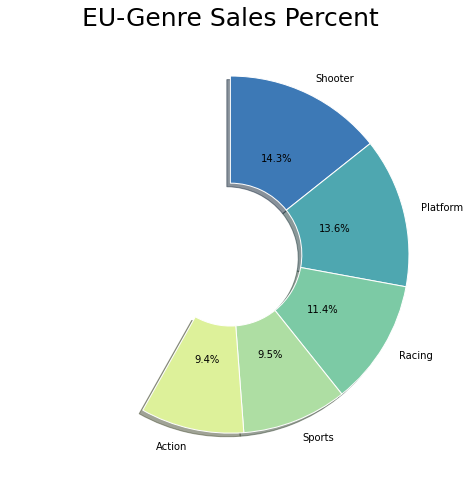

In [20]:
wedgeprops = {'width': 0.60, 'edgecolor': 'w', 'linewidth': 1}
colors = sns.color_palette('Spectral_r', len(genre_EU['Genre']))

plt.figure(figsize=(8,10))
plt.pie(genre_EU_top5['percentage'], 
        labels=genre_EU_top5['Genre'], 
        autopct='%.1f%%', 
        counterclock=False, 
        startangle=90,
        shadow = True,
        wedgeprops=wedgeprops,
        colors =colors);
plt.title('EU-Genre Sales Percent', fontsize=25);


In [21]:
df_games_JP= df_games[['Platform', 'Year', 'Genre', 'JP_Sales']]
genre_JP = df_games_JP.groupby('Genre').mean().sort_values('JP_Sales', ascending=False).reset_index()
genre_JP['percentage'] = genre_JP['JP_Sales'] / genre_JP['JP_Sales'].sum()
genre_JP_top5 = genre_JP.head(5)

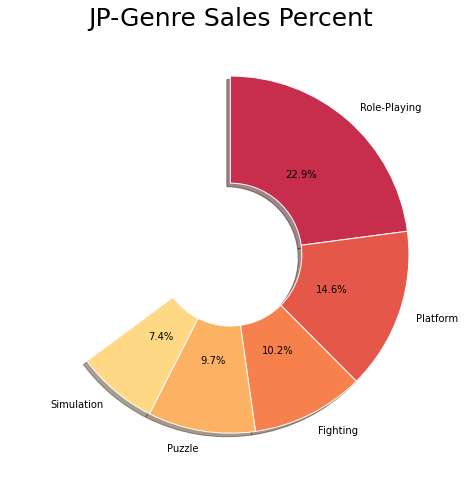

In [22]:
wedgeprops = {'width': 0.60, 'edgecolor': 'w', 'linewidth': 1}
colors = sns.color_palette('Spectral', len(genre_JP['Genre']))

plt.figure(figsize=(8,10))
plt.pie(genre_JP_top5['percentage'], 
        labels=genre_JP_top5['Genre'], 
        autopct='%.1f%%', 
        counterclock=False, 
        startangle=90,
        shadow = True,
        wedgeprops=wedgeprops,
        colors =colors);
plt.title('JP-Genre Sales Percent', fontsize=25);

In [23]:
df_games_Other= df_games[['Platform', 'Year', 'Genre', 'Other_Sales']]
genre_Other = df_games_Other.groupby('Genre').mean().sort_values('Other_Sales', ascending=False).reset_index()
genre_Other['percentage'] = genre_Other['Other_Sales'] / genre_Other['Other_Sales'].sum()
genre_Other_top5 = genre_Other.head(5)

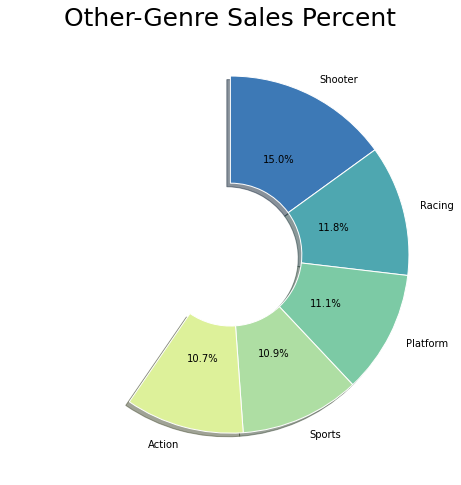

In [24]:
wedgeprops = {'width': 0.60, 'edgecolor': 'w', 'linewidth': 1}
colors = sns.color_palette('Spectral_r', len(genre_Other['Genre']))

plt.figure(figsize=(8,10))
plt.pie(genre_Other_top5['percentage'], 
        labels=genre_Other_top5['Genre'], 
        autopct='%.1f%%', 
        counterclock=False, 
        startangle=90,
        shadow = True,
        wedgeprops=wedgeprops,
        colors =colors);
plt.title('Other-Genre Sales Percent', fontsize=25);

In [25]:
# 일본을 제외한 다른 나라는 Platform, Shooter, Racing, Sports, Action 장르를 선호하는 반면
# 일본은 Role-Playing, Platform, Fighting, Fuzzle, Simulation 장르를 선호
# 
# 일본과 다른 나라가 차이점을 보이는 이유 
# 일본의 경우 80-90년대 닌텐도 및 PS 같은 비디오 게임 산업을 성공시킨 이후, 비디오 게임 산업의 주를 이뤘다.  
# 이러한 요소들이 일본인 게임문화에 주요한 영향을 주었고, 다른 나라와 차이를 보임. 

## 연도별 게임 트렌드 

In [26]:
df_games['Generation'] = np.where(df_games['Year'] < 1990, '1980', 
                        (np.where(df_games['Year'] < 1995, '1990_e',
                        (np.where(df_games['Year'] < 2000, '1990_l',
                        (np.where(df_games['Year'] < 2005, '2000_e',
                        (np.where(df_games['Year'] < 2010, '2000_l',
                        (np.where(df_games['Year'] < 2015, '2010_e',
                        (np.where(df_games['Year'] <= 2020, '2010_l', '2020')))))))))))))

In [27]:
# total_sales : JP 를 뺀 나머지 국가들의 출고량

df_games['total_sales'] = df_games['NA_Sales'] + df_games['EU_Sales'] + df_games['Other_Sales']

In [28]:
# JP를 뺀 나머지 국가의 연도별 게임 트렌드 

df_generation_genre = df_games[['Genre', 'Generation', 'total_sales']]
generation_genre = pd.DataFrame(df_generation_genre.groupby(['Generation', 'Genre']).mean().reset_index())

In [29]:
genre_list = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']

In [78]:
genre_1 = genre_list[0:4]
genre_2 = genre_list[4:8]
genre_3 = genre_list[8:12]

In [79]:
genre_1_df = generation_genre[generation_genre['Genre'].isin(genre_1)]
genre_2_df = generation_genre[generation_genre['Genre'].isin(genre_2)]
genre_3_df = generation_genre[generation_genre['Genre'].isin(genre_3)]


Text(0.5, 1.0, "'Aciton, Misc, Role-Playing, Sports' \n Genre Sales")

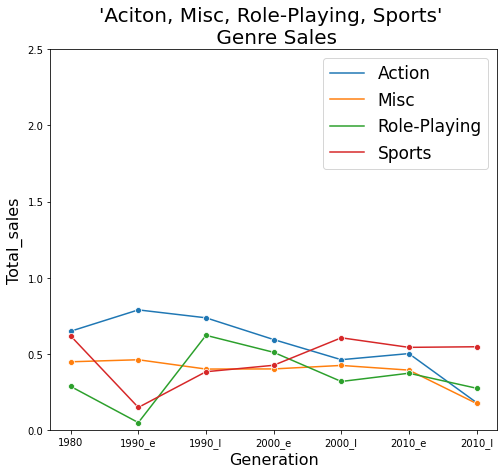

In [89]:
plt.figure(figsize = (8,7))
sns.lineplot(data=genre_1_df,
             x='Generation', 
             y='total_sales',
             hue='Genre', 
             marker ='o')
plt.ylim(0, 2.5)
plt.xlabel('Generation', fontsize = 16)
plt.ylabel('Total_sales', fontsize = 16)
plt.legend(fontsize = 17)
plt.title("'Aciton, Misc, Role-Playing, Sports' \n Genre Sales", fontsize = 20)

Text(0.5, 1.0, "'Adventrue, Platform, Racing, Shooter' \n Genre Sales")

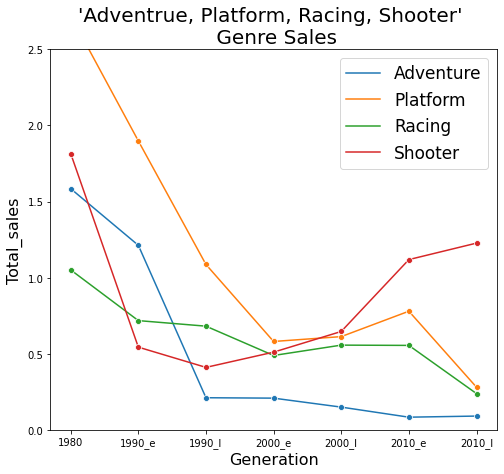

In [91]:
plt.figure(figsize = (8,7))
sns.lineplot(data=genre_2_df,
             x='Generation', 
             y='total_sales',
             hue='Genre', 
             marker ='o')
plt.ylim(0, 2.5)
plt.xlabel('Generation', fontsize = 16)
plt.ylabel('Total_sales', fontsize = 16)
plt.legend(fontsize = 17)
plt.title("'Adventrue, Platform, Racing, Shooter' \n Genre Sales", fontsize = 20)

Text(0.5, 1.0, "'Flighting, Puzzle, Simulation, Strategy' \n Genre Sales")

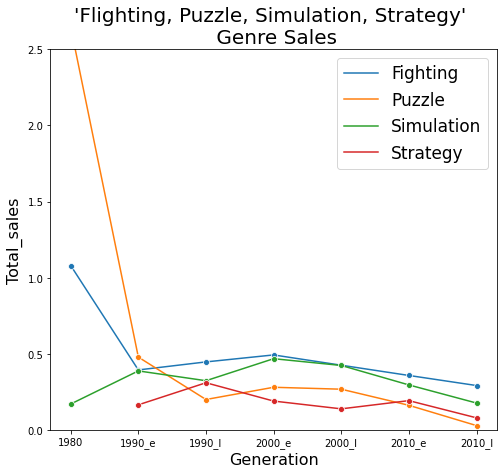

In [93]:
plt.figure(figsize = (8,7))
sns.lineplot(data=genre_3_df,
             x='Generation', 
             y='total_sales',
             hue='Genre', 
             marker ='o')
plt.ylim(0, 2.5)
plt.xlabel('Generation', fontsize = 16)
plt.ylabel('Total_sales', fontsize = 16)
plt.legend(fontsize = 17)
plt.title("'Flighting, Puzzle, Simulation, Strategy' \n Genre Sales", fontsize = 20)

In [35]:
# 전체적으로 게임 출고량이 줄어들고 있으나 최근 Shooter 장르가 상승한 것을 볼 수 있다. 

In [36]:
# JP의 연도별 게임 트렌드 

df_generation_genre_JP = df_games[['Genre', 'Generation', 'JP_Sales']]
generation_genre_JP = pd.DataFrame(df_generation_genre_JP.groupby(['Generation', 'Genre']).mean().reset_index())

In [83]:
genre_1_df_JP = generation_genre_JP[generation_genre_JP['Genre'].isin(genre_1)]
genre_2_df_JP = generation_genre_JP[generation_genre_JP['Genre'].isin(genre_2)]
genre_3_df_JP = generation_genre_JP[generation_genre_JP['Genre'].isin(genre_3)]


Text(0.5, 1.0, "'Aciton, Misc, Role-Playing, Sports' \n Genre Sales - JP")

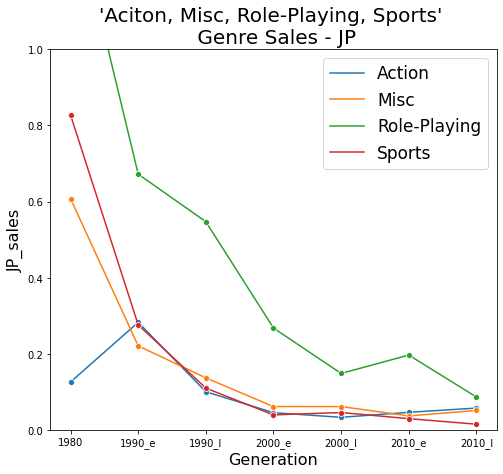

In [94]:
plt.figure(figsize = (8,7))
sns.lineplot(data=genre_1_df_JP,
             x='Generation', 
             y='JP_Sales',
             hue='Genre', 
             marker ='o')
plt.ylim(0, 1)
plt.xlabel('Generation', fontsize = 16)
plt.ylabel('JP_sales', fontsize = 16)
plt.legend(fontsize = 17)
plt.title("'Aciton, Misc, Role-Playing, Sports' \n Genre Sales - JP", fontsize = 20)

Text(0.5, 1.0, "'Adventure, Platform, Racing, Shooter' \n Genre Sales - JP")

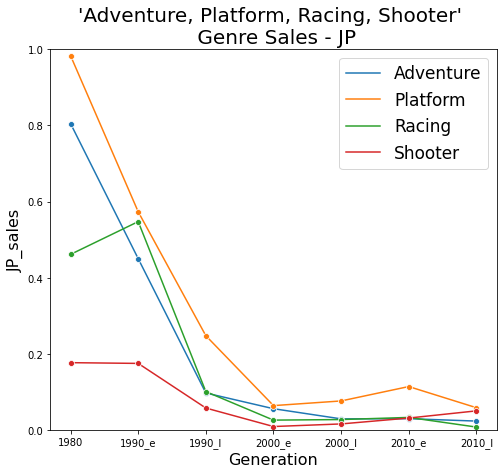

In [97]:
plt.figure(figsize = (8,7))
sns.lineplot(data=genre_2_df_JP,
             x='Generation', 
             y='JP_Sales',
             hue='Genre', 
             marker ='o')
plt.ylim(0, 1)
plt.xlabel('Generation', fontsize = 16)
plt.ylabel('JP_sales', fontsize = 16)
plt.legend(fontsize = 17)
plt.title("' Adventure, Platform, Racing, Shooter' \n Genre Sales - JP", fontsize = 20)

Text(0.5, 1.0, "'Flighting, Puzzle, Simulation, Strategy' \n Genre Sales - JP")

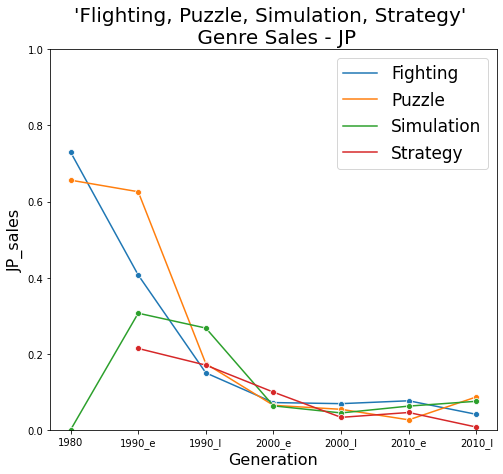

In [98]:
plt.figure(figsize = (8,7))
sns.lineplot(data=genre_3_df_JP,
             x='Generation', 
             y='JP_Sales',
             hue='Genre', 
             marker ='o')
plt.ylim(0, 1)
plt.xlabel('Generation', fontsize = 16)
plt.ylabel('JP_sales', fontsize = 16)
plt.legend(fontsize = 17)
plt.title("'Flighting, Puzzle, Simulation, Strategy' \n Genre Sales - JP", fontsize = 20)

In [41]:
# 일본은 전체적으로 게임 출고량이 감소했고, Puzzle, Simulation 장르 출고량이 비교적 상승한 것을 보임

In [42]:
# 전체적으로 게임 출고량이 감소하는 이유 : 게임 산업이 전체적으로 모바일 게임으로 바뀌고 있고, 
#                                          실제로 모바일 게임에 소비자가 지출하는 비용이 점점 커지고 있음. 

# https://m.fntimes.com/html/view.php?ud=202205261604279180645ffc9771_18
# https://myindie.onstove.com/143713209/view/H::6525184

In [43]:
# 게임 개발 스타트업으로 설정

# 최근 경향을 보면 Shooter 게임이 대세를 이룸.
# 일본은 전체적으로 크게 차이가 없음 
# -> Shooter 게임 장르로 추진 + 모바일 플랫폼을 이용

In [44]:
# 스타트업으로 진입 장벽이 낮은 모바일 플랫폼으로 Shooter 게임을 시작하고 
# 기업이 발전하면 
# 2022 게임 상 받은 자료 (https://www.ign.com/articles/best-game-2022)
# 2023 기대작을 바탕으로 (https://www.ign.com/articles/biggest-games-of-2023)
# 다양한 플랫폼으로 open word RPG 게임으로